<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/07-trees/DecisionTrees_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Moskvicheva Polina, мИИПИ20-2022

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

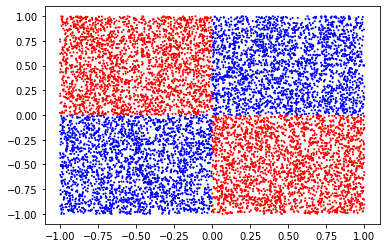

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

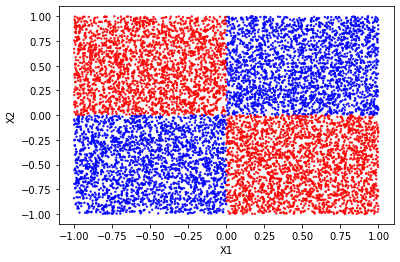

In [4]:
#generated points
n = 10000
X_toy = np.random.uniform(-1,1, (n,2))
y = np.logical_xor(X_toy[:,0] >= 0, X_toy[:,1] >= 0)
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y, alpha=0.8, cmap='bwr', s=2)
plt.xlabel('X1'), plt.ylabel('X2');

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
X_toy_train, X_toy_test, y_toy_train, y_toy_test = train_test_split(X_toy, y, test_size=0.25)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_toy_train, y_toy_train)
accuracy_score(y_toy_test, clf.predict(X_toy_test))

1.0

In [25]:
from sklearn.metrics import accuracy_score



def plot_decision_surface(
                  clf, X, y,
                  nx=200, ny=100,
                  cmap='bwr',
                  alpha=0.6,
        ):
    """
    Plot the decision boundary of clf on X and y, visualize training points
    """
    
    # Define the grid
    x_top_left = X.min(axis=0) - 1
    x_bottom_right = X.max(axis=0) + 1
    grid_x0, grid_x1 = np.meshgrid(
         np.linspace(x_top_left[0], x_bottom_right[0], ny),
         np.linspace(x_top_left[1], x_bottom_right[1], nx)
      )
    
    # Calculate predictions on the grid
    y_pred_grid = clf.predict(
                        np.stack(
                              [
                                grid_x0.ravel(),
                                grid_x1.ravel()
                              ],
                              axis=1
                            )
                      ).reshape(grid_x1.shape)
    
    # Find optimal contour levels and make a filled
    # contour plot of predictions
    labels = np.sort(np.unique(y))
    labels = np.concatenate([[labels[0] - 1],
                             labels,
                             [labels[-1] + 1]])
    medians = (labels[1:] + labels[:-1]) / 2

    plt.rcParams["figure.figsize"] = (10,10)
    plt.contourf(grid_x0, grid_x1, y_pred_grid, cmap=cmap, alpha=alpha,
                 levels=medians)
    
    # Scatter data points on top of the plot,
    # with different styles for correct and wrong
    # predictions
    y_pred = clf.predict(X)
    plt.scatter(*X[y_pred==y].T, c=y[y_pred==y],
                marker='o', cmap=cmap, s=1, label='correct')
    plt.scatter(*X[y_pred!=y].T, c=y[y_pred!=y],
                marker='x', cmap=cmap, s=1, label='errors')

    # Dummy plot call to print the accuracy in the legend.
    plt.plot([], [], ' ',
             label='Accuracy = {:.3f}'.format(accuracy_score(y, y_pred)))
    
    plt.legend(loc='best')
    plt.show()

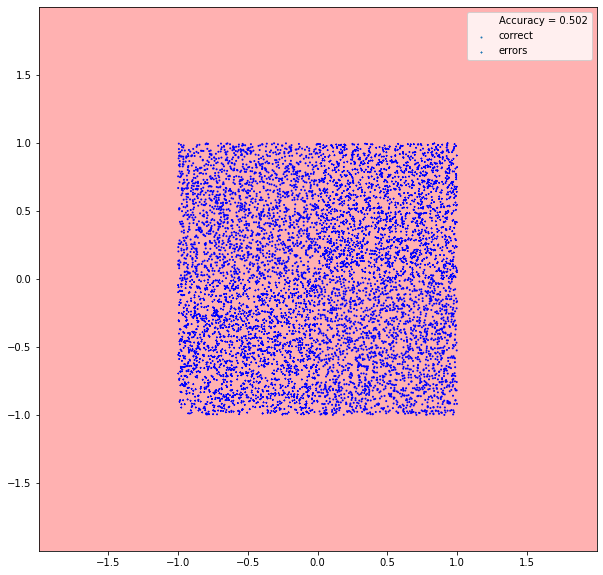

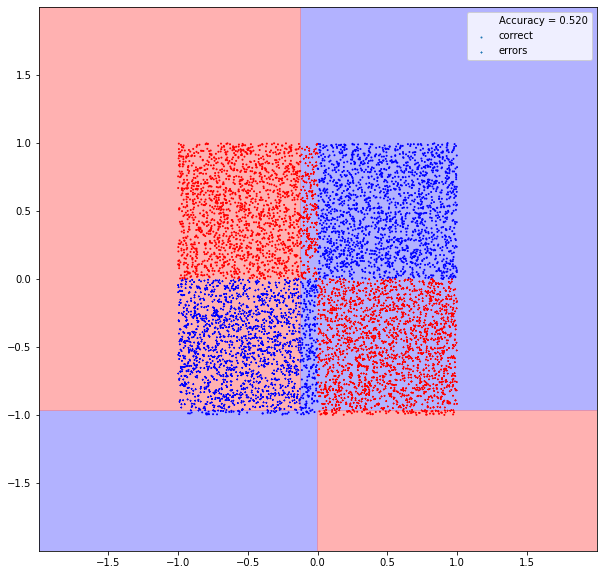

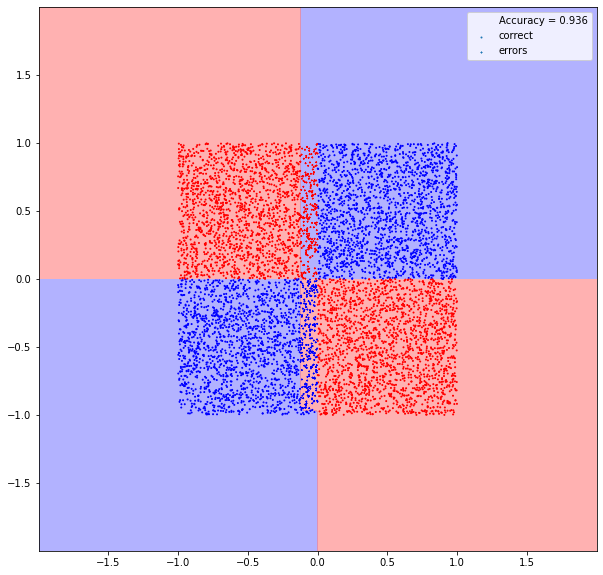

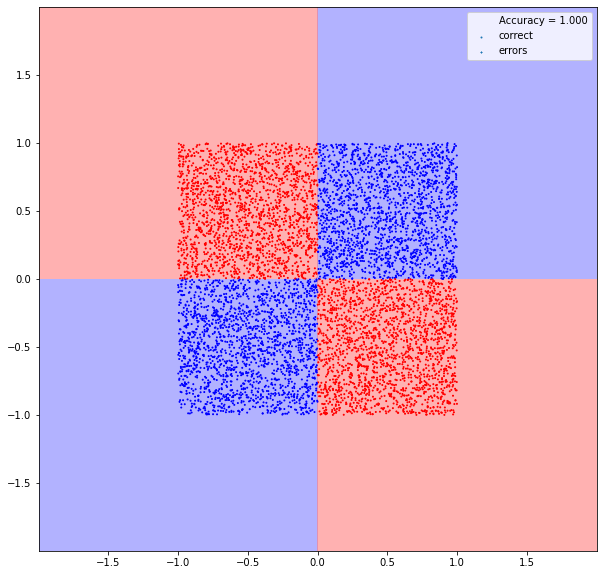

4
[0.4964, 0.512, 0.9356, 1.0]


In [26]:
accuracy = 0
accuracy_history = []
depth_value = 1


while accuracy <= 0.99:
    clf = DecisionTreeClassifier(max_depth=depth_value)
    clf.fit(X_toy_train, y_toy_train)
    accuracy = accuracy_score(y_toy_test, clf.predict(X_toy_test))
    accuracy_history.append(accuracy)
    res = depth_value

    # plt.subplot(1, 5, depth_value)
    plot_decision_surface(clf, X_toy_train, y_toy_train)
  
    depth_value += 1


print(res)    
print(accuracy_history)

[Text(0.5892857142857143, 0.9166666666666666, 'X[1] <= -0.998\ngini = 0.5\nsamples = 7500\nvalue = [3789, 3711]'),
 Text(0.5178571428571429, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6607142857142857, 0.75, 'X[0] <= 0.961\ngini = 0.5\nsamples = 7496\nvalue = [3789, 3707]'),
 Text(0.4642857142857143, 0.5833333333333334, 'X[0] <= 0.633\ngini = 0.5\nsamples = 7369\nvalue = [3713, 3656]'),
 Text(0.2857142857142857, 0.4166666666666667, 'X[1] <= -0.006\ngini = 0.5\nsamples = 6098\nvalue = [3113, 2985]'),
 Text(0.14285714285714285, 0.25, 'X[0] <= -0.0\ngini = 0.468\nsamples = 3055\nvalue = [1911, 1144]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1911\nvalue = [1911, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1144\nvalue = [0, 1144]'),
 Text(0.42857142857142855, 0.25, 'X[0] <= -0.0\ngini = 0.478\nsamples = 3043\nvalue = [1202, 1841]'),
 Text(0.35714285714285715, 0.08333333333333333, 'gini = 0.008\nsamples = 1838\nv

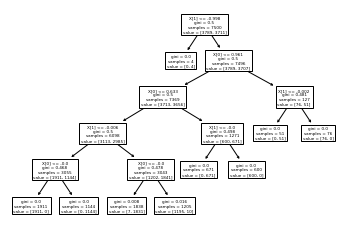

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=depth_value)

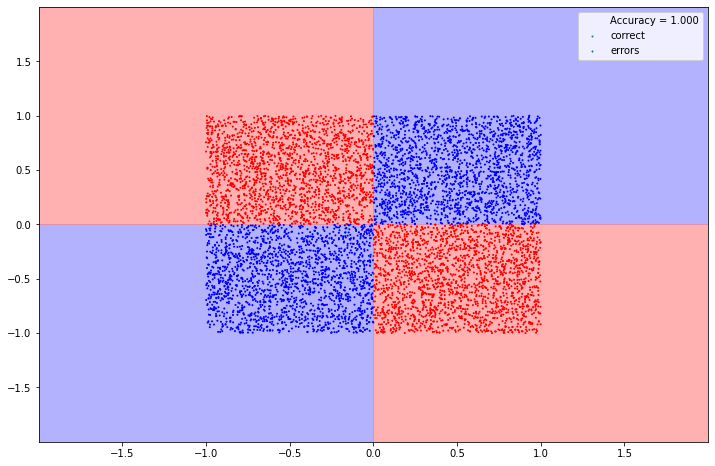

In [27]:
plt.figure(figsize=(12, 8))
plot_decision_surface(clf, X_toy_train, y_toy_train)

# Task 2 (3 points)

Consider the following dataset:

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [29]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [30]:
model = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})

In [54]:
param_grid = {'max_depth' : np.arange(1,10), 'min_samples_leaf' : np.arange(1,20)}
gscv = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1)

gscv.fit(X_train, y_train)
print(gscv.best_params_)
print(gscv.best_score_)


{'max_depth': 6, 'min_samples_leaf': 12}
0.9844428959405376


Text(0, 0.5, 'true positive rate')

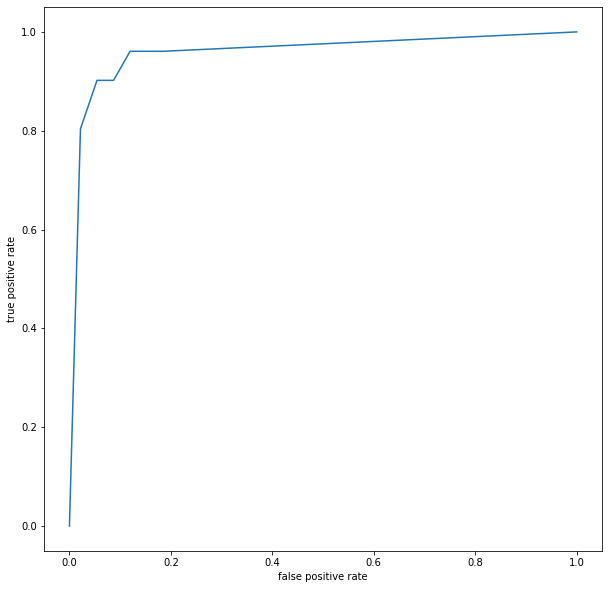

In [55]:
gscv_predictions = gscv.predict_proba(X_test)[:,1]
fpr,tpr,_ = roc_curve(y_test, gscv_predictions, pos_label='malignant')
plt.plot(fpr,tpr,label="roc auc")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')